In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d
from halton_points import HaltonPoints
from function_Fm import *
from explicit_RK import *


## Boundary

In [2]:
nf = (2**0+1)**2
r = HaltonPoints(2, nf).haltonPoints()
fxl = r.copy()
fxl[:, 0] = 0
fxr = r.copy()
fxr[:, 0] = 1
fyu = r.copy()
fyu[:, 1] = 0
fyd = r.copy()
fyd[:, 1] = 1
Mb = np.vstack((fxl, fxr, fyu, fyd))

boundary_points = pd.DataFrame(Mb, columns=['x', 'y'])
boundary_points['Collocation'] = 'Boundary'

## Interior

In [3]:
poly_b = np.array([[-1, -1, 1], [1/2, 3/2, -1], [3/2, 1/8, -3/8]])
npnts = (2**2+1)**2

uh = assembled_matrix(Mb=Mb, npnts=npnts, poly_b=poly_b, rbf='TPS')
X0 = uh.X_0()

interior_points = pd.DataFrame(uh.Mi, columns=['x', 'y'])
interior_points['Collocation'] = 'Interior'

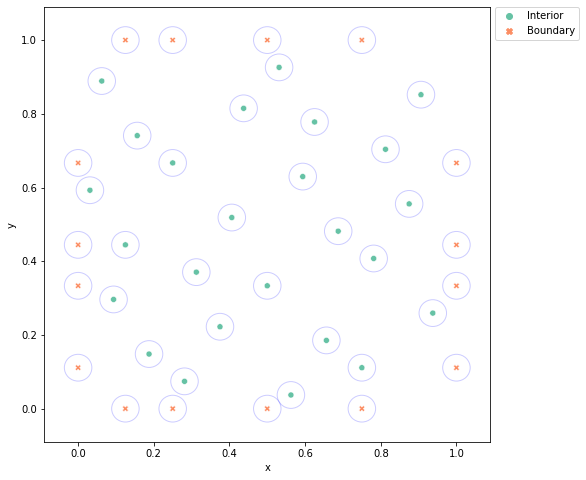

In [4]:
points = pd.concat([interior_points, boundary_points])

stable = stabillity(Mb, npnts)
qx = stable.qX()

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='x', y='y', data=points, hue='Collocation',
                style='Collocation', palette='Set2')
for hk in points[['x', 'y']].values:
    c = plt.Circle(hk, qx, fill=False, alpha=0.2, color='b')
    ax.add_patch(c)

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);

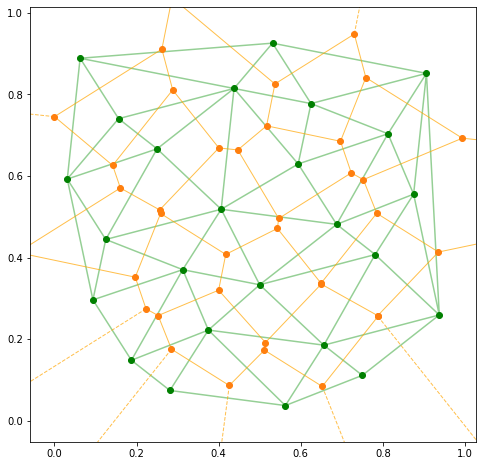

In [5]:
tri = Delaunay(uh.Mi)
vor = Voronoi(uh.Mi)

fig, axs = plt.subplots(figsize=(8, 8))
g = voronoi_plot_2d(vor, ax=axs, line_colors='orange', line_alpha=0.7)
plt.triplot(uh.Mi[:, 0], uh.Mi[:, 1], tri.simplices, alpha=0.5)
plt.plot(uh.Mi[:, 0], uh.Mi[:, 1], 'o', color='g')
plt.show()


In [6]:
print("Interior points: {:,.0f} \nBoundary points: {:,.0f} \nTotal points: {:,.0f}".format(uh.Mi.shape[0], uh.Mb.shape[0], uh.Mi.shape[0] + uh.Mb.shape[0]))

Interior points: 25 
Boundary points: 16 
Total points: 41


In [10]:
#uh.epsilon = 5.956
stable = stabillity(Mb, npnts)
cond, det = stable.cond_num(uh.ACaps())
print('Condition number: {:,.0f} \nDeterminant: {:,.9f}'.format(cond, det))

Condition number: 9 
Determinant: -79,470.449290551


In [11]:
t0, te = 0, 1
N = 100
X0 = uh.X_0()
exp_RK = explicit_RungeKutta(Fm, X0, t0, te, N, uh)

In [12]:
exp_RK.solve()

t=0.01
t=0.02
t=0.03
t=0.04
t=0.05
t=0.06
t=0.07
t=0.08
t=0.09
t=0.1
t=0.11
t=0.12
t=0.13
t=0.14
t=0.15
t=0.16
t=0.17
t=0.18
t=0.19
t=0.2
t=0.21
t=0.22
t=0.23
t=0.24
t=0.25
t=0.26
t=0.27
t=0.28
t=0.29
t=0.3
t=0.31
t=0.32
t=0.33
t=0.34
t=0.35000000000000003
t=0.36
t=0.37
t=0.38
t=0.39
t=0.4
t=0.41000000000000003
t=0.42
t=0.43
t=0.44
t=0.45
t=0.46
t=0.47000000000000003
t=0.48
t=0.49
t=0.5
t=0.51
t=0.52
t=0.53
t=0.54
t=0.55
t=0.56
t=0.5700000000000001
t=0.58
t=0.59
t=0.6
t=0.61
t=0.62
t=0.63
t=0.64
t=0.65
t=0.66
t=0.67
t=0.68
t=0.6900000000000001
t=0.7000000000000001
t=0.71
t=0.72
t=0.73
t=0.74
t=0.75
t=0.76
t=0.77
t=0.78
t=0.79
t=0.8
t=0.81
t=0.8200000000000001
t=0.8300000000000001
t=0.84
t=0.85
t=0.86
t=0.87
t=0.88
t=0.89
t=0.9
t=0.91
t=0.92
t=0.93
t=0.9400000000000001
t=0.9500000000000001
t=0.96
t=0.97
t=0.98
t=0.99
t=1.0


In [13]:
exp_RK.timegrid

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [14]:
def plot_solution(M, Mi, i):
    n = int(M.shape[0]/Mi.shape[0])
    df_i = pd.DataFrame()
    for _ in range(n):
        df_i = pd.concat([df_i, pd.DataFrame(Mi, columns=['x', 'y'])])
    df_i = df_i.reset_index().rename(columns={'index': 'i'})
    df = pd.DataFrame(M, columns=['u', 'v', 't'])
    df = pd.concat([df_i, df], axis=1)
    dff = df.loc[df['i'] == i]
    plt.figure(figsize=(8, 8))
    sns.lineplot(x='t', y='v', data=dff)
    return df

def u(Mi, norm_x, t, alpha=1.):
    return Mi/((t+alpha) + (t+alpha)**2 * np.exp(norm_x**2/(4*(alpha +t))))

In [15]:
norm_x = np.linalg.norm(uh.Mi, axis=1).reshape(-1,1)
ex = u(uh.Mi, norm_x, 0.99)
np.mean(abs(ex - exp_RK.solution[99])/ex)*100

5.739906433692454

In [16]:
norm_x = np.linalg.norm(uh.Mi, axis=1).reshape(-1, 1)
n = exp_RK.solution.shape[0]
error = list()
for t in exp_RK.timegrid[1:]:
    ei = np.sqrt((np.linalg.norm(u(uh.Mi, norm_x, t)-exp_RK.solution[int(t*100)]))/n)
    error.append(ei)

Text(0, 0.5, 'RMSE')

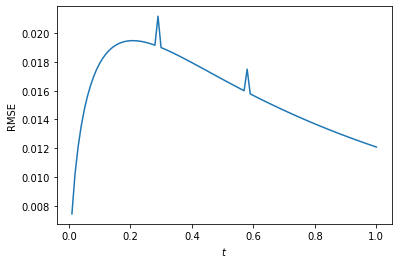

In [27]:
plt.plot(exp_RK.timegrid[1:], error)
plt.xlabel("$t$")
plt.ylabel("RMSE")

In [21]:
t
np.sqrt((np.linalg.norm(u(uh.Mi, norm_x, 0.99)-exp_RK.solution[99]))/exp_RK.solution.shape[0])

0.012162219607333477

In [19]:
exp_RK.solution.shape

(101, 9, 2)

In [ ]:
sol_dict = {}
for ti in range(exp_RK.solution.shape[0]):
    sol_dict[str(ti/100)] = str(exp_RK.solution[ti])

In [ ]:
import json

with open("solution.json", 'w') as outf:
    json.dump(sol_dict, outf)

## Exact solution

In [ ]:
norm_x = np.linalg.norm(uh.Mi, axis=1).reshape(-1,1)
ni = uh.Mi.shape[0]
u0= u(uh.Mi, norm_x, 0.)
u0 = np.hstack((u0, np.array([0.]*ni).reshape(-1,1)))
for t in exp_RK.timegrid[1:]:
    ui= u(uh.Mi, norm_x, t)
    ui = np.hstack((ui, np.array([t]*ni).reshape(-1,1)))
    u0 = np.vstack((u0, ui))

exact_sol = plot_solution(u0, uh.Mi, 0)

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 0.025)
Y = np.arange(0, 1, 0.025)
n_X = np.linalg.norm(np.hstack((X.reshape(-1,1), Y.reshape(-1,1))), axis=1).reshape(-1,1)
X, Y = np.meshgrid(X, Y)
t=0.05
V = Y/((1+t) + (1+t)*np.exp(n_X/(4*(1+t))))

# Plot the surface.
surf = ax.plot_surface(X, Y, V, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [ ]:
L, H = np.pi*np.mgrid[-1:1:1000j, -1:1:1000j]
T = np.cos(L)*np.cos(2*H)
H = np.cos(L) + H
fig, ax = plt.subplots()
surf = plt.contourf(L, H, T, cmap="hot")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [ ]:
L, H = np.pi*np.mgrid[-1:1:10j, -1:1:10j]
L

In [ ]:
ti = exact_sol.t.unique()[5]
sol_i = exact_sol[exact_sol['t'] == ti][['u', 'v']].values

In [ ]:
app_u_i = X0 + ti*Fm(X0, uh)
np.mean(abs(sol_i- app_u_i)[:,0])

## Solution

In [ ]:
sol = FDM_time(timegrid, X0, uh)
for t, s in sol.items():
    print('Time: {:,.4f}'.format(t))
    print(s, '\n')